In [1]:
#Twitter Bot Detection 

In [1]:
#import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#File Reading

filepath = 'C:/Users/patel/Downloads/'
#filepath = 'https://raw.githubusercontent.com/jubins/ML-TwitterBotDetection/master/FinalProjectAndCode/kaggle_data/'
file= filepath+'training_data_2_csv_UTF.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]

In [3]:
training_data.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1


In [4]:
training_data.shape #dataframe info

(2797, 20)

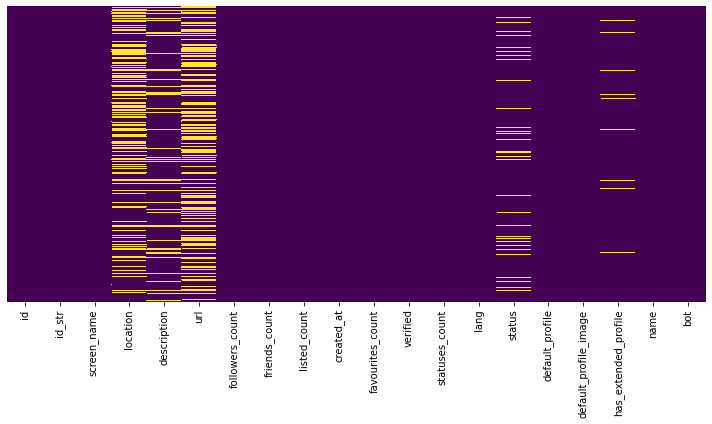

In [5]:
#This function gives heatmap of all NaN values   
def get_heatmap(df):
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)

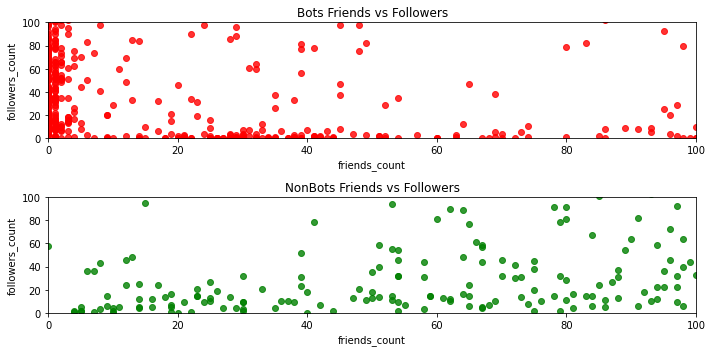

In [6]:
#Bots Friends and Followers Count Plot
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='green', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [7]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape

(952, 21)

(504, 21)


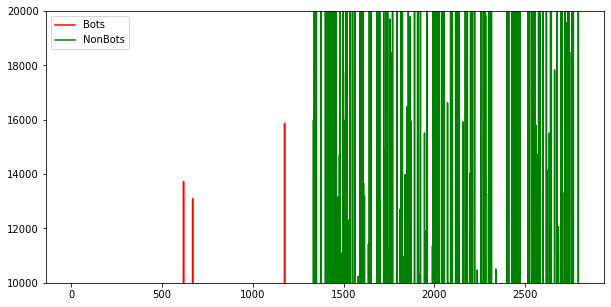

In [8]:
#Plot Bots vs NonBots
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='green', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)

In [9]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

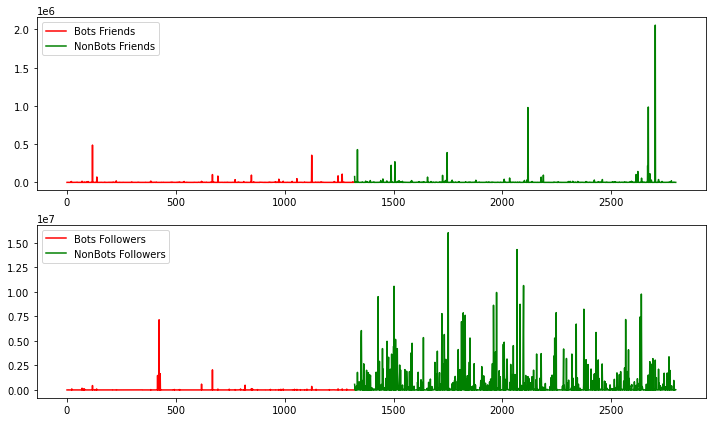

In [10]:
#plot Bot Friends vs NonBot Friends Graph
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='green', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='green', label='NonBots Followers')
plt.legend(loc='upper left')

In [11]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 24)

In [12]:
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1476, 24)

In [13]:
df = pd.concat([bots, nonbots])
df.shape

(2797, 24)

In [14]:
#Finding Correlation 
df.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.228328,0.150100
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.577157,0.458213,0.189675,0.130717
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.427638,0.342145,0.082692,-0.210592
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.681034,0.338698,0.188797,0.281360
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.104797,0.408864,0.120941,-0.220894
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.419815,0.434177,0.191922,0.346505
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.533971,0.162213,0.105333,0.207384
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.197929,-0.377572,-0.138378,0.072351
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190986,-0.166388,0.000596,0.033021
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000,-0.044056,-0.843429,-0.266342,0.606771


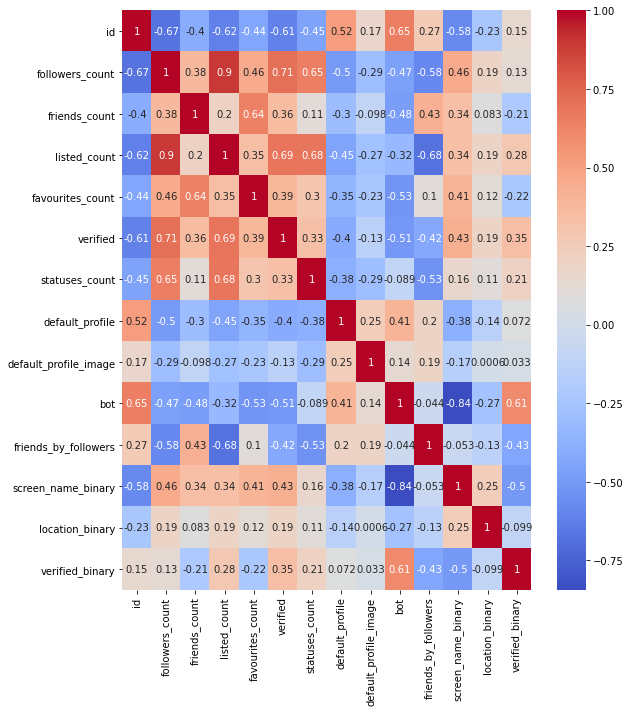

In [15]:
plt.figure(figsize=(9,10))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [19]:
filepath = 'C:/Users/patel/Downloads/'
file= open(filepath+'training_data_2_csv_UTF.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

In [20]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))


Trainig Accuracy: 0.88707
Test Accuracy: 0.87857


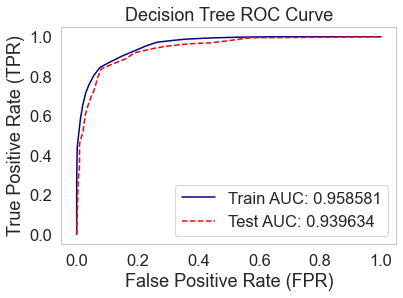

In [22]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

In [23]:
from sklearn.naive_bayes import MultinomialNB

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

mnb = MultinomialNB(alpha=0.0009)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

mnb = mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.67961
Test Accuracy: 0.69762


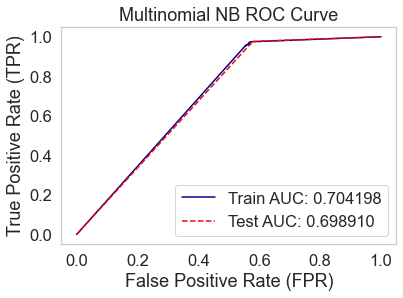

In [24]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Multinomial NB ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.87583
Test Accuracy: 0.85952


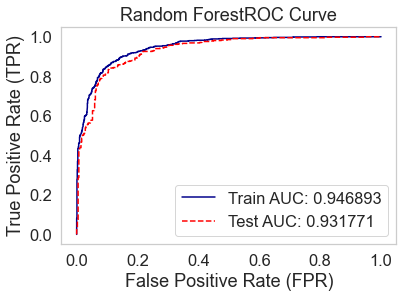

In [26]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

Train Accuracy:  0.979047619047619
Test Accuracy:  0.9688826025459689


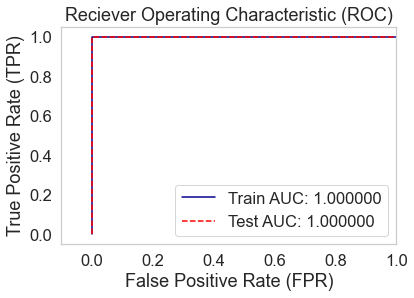

In [28]:
import time
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


class twitter_bot(object):
    def __init__(self):
        pass

    def perform_train_test_split(df):
        msk = np.random.rand(len(df)) < 0.75
        train, test = df[msk], df[~msk]
        X_train, y_train = train, train.iloc[:,-1]
        X_test, y_test = test, test.iloc[:, -1]
        return (X_train, y_train, X_test, y_test)

    def bot_prediction_algorithm(df):
        # creating copy of dataframe
        train_df = df.copy()
        # performing feature engineering on id and verfied columns
        # converting id to int
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        #train_df['friends_count'] = train_df.friends_count.apply(lambda x: int(x))
        train_df['followers_count'] = train_df.followers_count.apply(lambda x: 0 if x=='None' else int(x))
        train_df['friends_count'] = train_df.friends_count.apply(lambda x: 0 if x=='None' else int(x))
             
        #bag_of_words_for_bot
        bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
        
        # converting verified into vectors
        train_df['verified'] = train_df.verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)

        # check if the name contains bot or screenname contains b0t
        condition = ((train_df.name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.description.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.status.str.contains(bag_of_words_bot, case=False, na=False))
                     )  # these all are bots
        predicted_df = train_df[condition]  # these all are bots
        predicted_df.bot = 1
        predicted_df = predicted_df[['id', 'bot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if description contains buzzfeed
        buzzfeed_df = verified_df[~condition]
        condition = (buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False))  # these all are nonbots
        predicted_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if listed_count>16000
        listed_count_df = buzzfeed_df[~condition]
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.listed_count > 16000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'bot']]
        predicted_df1.bot = 0 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        return predicted_df

    def get_predicted_and_true_values(features, target):
        y_pred, y_true = twitter_bot.bot_prediction_algorithm(features).bot.tolist(), target.tolist()
        return (y_pred, y_true)

    def get_accuracy_score(df):
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.accuracy_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.accuracy_score(y_pred_test, y_true_test)
        return (train_acc, test_acc)

    def plot_roc_curve(df):
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # Train ROC
        y_pred_train, y_true = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        scores = np.linspace(start=0.01, stop=0.9, num=len(y_true))
        fpr_train, tpr_train, threshold = metrics.roc_curve(y_pred_train, scores, pos_label=0)
        plt.plot(fpr_train, tpr_train, label='Train AUC: %5f' % metrics.auc(fpr_train, tpr_train), color='darkblue')
        #Test ROC
        y_pred_test, y_true = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        scores = np.linspace(start=0.01, stop=0.9, num=len(y_true))
        fpr_test, tpr_test, threshold = metrics.roc_curve(y_pred_test, scores, pos_label=0)
        plt.plot(fpr_test,tpr_test, label='Test AUC: %5f' %metrics.auc(fpr_test,tpr_test), ls='--', color='red')
        #Misc
        plt.xlim([-0.1,1])
        plt.title("Reciever Operating Characteristic (ROC)")
        plt.xlabel("False Positive Rate (FPR)")
        plt.ylabel("True Positive Rate (TPR)")
        plt.legend(loc='lower right')
        plt.show()


if __name__ == '__main__':
    start = time.time()
    train_df = pd.read_csv("C:/Users/patel/Downloads/training_data_2_csv_UTF.csv")
    test_df = pd.read_csv('C:/Users/patel/Desktop/KJ_Fnl_Project/archive/test_data_4_students.csv')
    print("Train Accuracy: ", twitter_bot.get_accuracy_score(train_df)[0])
    print("Test Accuracy: ", twitter_bot.get_accuracy_score(train_df)[1])

    #predicting test data results
    predicted_df = twitter_bot.bot_prediction_algorithm(test_df)
    #plotting the ROC curve
    twitter_bot.plot_roc_curve(train_df)

In [29]:
#Hybrid Approach
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Reading the dataset
dataset = pd.read_csv('C:/Users/patel/Downloads/features.csv')
X = dataset.iloc[:, 1:10].values
y = dataset.iloc[:, 10].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
from sklearn.compose import ColumnTransformer
t = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = t.fit_transform(X)
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Defining the machine learning models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth = 2)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 = GaussianNB()

#Training the machine learning models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

#Making the prediction
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

#Confusion matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTree = confusion_matrix(y_test, y_pred2)
cm_SupportVectorClass = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y_test, y_pred4)
cm_NaiveBayes = confusion_matrix(y_test, y_pred5)

print(' confusion matrix for LogisticRegression : ')
print(cm_LogisticRegression)
print('confusion matrix for Decision Tree : ')
print(cm_DecisionTree)
print('confusion matrix for SuppportVectorClass : ')
print(cm_SupportVectorClass)
print('confusion matrix for KNN : ')
print(cm_KNN)
print('confusion matrix for NaiveBayes : ')
print(cm_NaiveBayes)

#10-fold cross-validation 
kfold = model_selection.KFold(n_splits=10, random_state = 0)
result1 = model_selection.cross_val_score(model1, X_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, X_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, X_train, y_train, cv=kfold)
result4 = model_selection.cross_val_score(model4, X_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(model5, X_train, y_train, cv=kfold)

#Printing the accuracies achieved in cross-validation
print('Accuracy of Logistic Regression Model = ',result1.mean())
print('Accuracy of Decision Tree Model = ',result2.mean())
print('Accuracy of Support Vector Machine = ',result3.mean())
print('Accuracy of k-NN Model = ',result4.mean())
print('Accuracy of Naive Bayes Model = ',result5.mean())

 confusion matrix for LogisticRegression : 
[[190  32]
 [ 64 134]]
confusion matrix for Decision Tree : 
[[199  23]
 [ 44 154]]
confusion matrix for SuppportVectorClass : 
[[206  16]
 [ 78 120]]
confusion matrix for KNN : 
[[183  39]
 [ 21 177]]
confusion matrix for NaiveBayes : 
[[ 93 129]
 [  0 198]]
Accuracy of Logistic Regression Model =  0.7476030918696592
Accuracy of Decision Tree Model =  0.8355263624437116
Accuracy of Support Vector Machine =  0.7497145693720526
Accuracy of k-NN Model =  0.8367762294791333
Accuracy of Naive Bayes Model =  0.7000390029429493


In [30]:
#Api Extraction

from requests_oauthlib import OAuth1Session
import os
import json
import csv
import webbrowser 

# In your terminal please set your environment variables by running the following lines of code.
# export 'CONSUMER_KEY'='<your_consumer_key>'
# export 'CONSUMER_SECRET'='<your_consumer_secret>'

consumer_key='qrbvg9yW3oNQ9QO95SM31FcWr'
consumer_secret='B88u2Rh1t0watdxyDjn4toE63GaSpDft78B5uKlgOV3h7mbWu0'

# User fields are adjustable, options include:
# created_at, description, entities, id, location, name,
# pinned_tweet_id, profile_image_url, protected,
# public_metrics, url, username, verified, and withheld

#fields = "created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld"
fields = "id,name,username,created_at,description,location,verified,url,entities,pinned_tweet_id,profile_image_url,protected,public_metrics,withheld"

#params = {"usernames": "chrisbrown,adsapi,RubiDilaik,jinisha103,JinishaJain17,tetelyricbot,ComplotBot,WokeBotNL,Kara___Gozlum,NicoleFernwood,ducknoteprice,BCCI,everyailment,50cent,jamieph93986621,charand522,virendersehwag,Hedgehogize,cgagraphics,IanMaksin,bxc_biochem,jHYtseBot,VerifiedBioBot,adjectives_bot,VeloxBots,ghost_things,mybmc,TF_binding_bot,khilanii,ROBODRUDGE,darlingfandoms,magicpixx,UdarOfficial,big_ban_clock,arjitk,moonshotbot,Shubham24680939,kindaboredaf,rohit_saggam,Its_Janhvi,SaiVignan12,two_artists,RamKutt73005724,DeepikaSRajawat,SketchCharacter,BiIndia,knock2bot,FCSVarunMotwani,emoji_haiku,Vivek_investor,ctelyricsbot,nakulvibhor,Pure_Africka,clubstatuses,Delee1087,Chell56704574,PopMa98,prankya,TheSiliconHill,imVkohli,CricCrazyJohns,Alchica84,Itz_Master7,botsplain,BeansGoated,FEveryStartup,ournameisMAGIC,landscapesorter,ThrowbackHoops,HAL_4500,vikram_ghanote,PatelHom1,JaveriyaShaikh4,excelmovies,AadarJain,Businewss_Bot,BlazonUrban,Bot_of_Jonathan,eventuallybot,GameOfLifeBot,PERMUTANT","user.fields": fields}
params = {"usernames": "jinisha103","user.fields": fields}

# Get request token
request_token_url = "https://api.twitter.com/oauth/request_token"
oauth = OAuth1Session(consumer_key, client_secret=consumer_secret)

try:
    fetch_response = oauth.fetch_request_token(request_token_url)
except ValueError:
    print(
        "There may have been an issue with the consumer_key or consumer_secret you entered."
    )
resource_owner_key = fetch_response.get("oauth_token")
resource_owner_secret = fetch_response.get("oauth_token_secret")
print("Got OAuth token: %s" % resource_owner_key)

# # Get authorization
base_authorization_url = "https://api.twitter.com/oauth/authorize"
authorization_url = oauth.authorization_url(base_authorization_url)
print("Please go here and copy the authorization code")
webbrowser.register('chrome',None,webbrowser.BackgroundBrowser("C:\Program Files (x86)\Google\Chrome\Application\chrome.exe"))
webbrowser.get('chrome').open(authorization_url)
verifier = input("Paste the PIN here: ")

# Get the access token
access_token_url = "https://api.twitter.com/oauth/access_token"
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=resource_owner_key,
    resource_owner_secret=resource_owner_secret,
    verifier=verifier,
)
oauth_tokens = oauth.fetch_access_token(access_token_url)

access_token = oauth_tokens["oauth_token"]
access_token_secret = oauth_tokens["oauth_token_secret"]

# Make the request
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
)

response = oauth.get(
    "https://api.twitter.com/labs/2/users/by", params=params
)

if response.status_code != 200:
    raise Exception(
        "Request returned an error: {} {}".format(response.status_code, response.text)
    )

print("Response code: {}".format(response.status_code))

json_response = response.json()

print(json.dumps(json_response, indent=4, sort_keys=True))
with open('data.json', 'w') as outfile:
    json.dump(json_response, outfile)


#save as json file and convert to csv
with open('data.json') as json_file:
    data = json.load(json_file)

twitter_data = data['data']

# now we will open a file for writing
data_file = open('data_file.csv', 'w', encoding="utf-8")

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing
# headers to the CSV file
count = 0

for twt in twitter_data:
    if count == 0:

        # Writing headers of CSV file
        header = twt.keys()
        csv_writer.writerow(header)
        count += 1

    # Writing data of CSV file
    csv_writer.writerow(twt.values())

data_file.close()



Got OAuth token: HdJ9bwAAAAABNmPqAAABebOsXEQ
Please go here and copy the authorization code
Paste the PIN here: 4093115
Response code: 200
{
    "data": [
        {
            "created_at": "2016-02-25T08:52:08.000Z",
            "description": "Hey there !",
            "id": "702778089118433281",
            "name": "JINISHA JAIN",
            "profile_image_url": "https://pbs.twimg.com/profile_images/704919881951608832/ptnpJ1I1_normal.jpg",
            "protected": true,
            "public_metrics": {
                "followers_count": 1,
                "following_count": 10,
                "listed_count": 0,
                "tweet_count": 5
            },
            "url": "",
            "username": "jinisha103",
            "verified": false
        }
    ]
}


In [27]:
import json 
import re  
json_as_string = open('data.json', 'r') 
# Call this as a recursive function if your json is highly nested 
lines = [re.sub("{\{\{\]]*","",one_object.rstrip()) for one_object in json_as_string.readlines()] 
 
json_as_list = "".join(lines).split('}') 
for elem in json_as_list: 
     if len(elem) > 0: 

            print(json.loads(json.dumps("{" + elem[::1]+"}")))

{{"data": [{"id": "702778089118433281", "public_metrics": {"followers_count": 1, "following_count": 11, "tweet_count": 4, "listed_count": 0}
{, "protected": true, "verified": false, "url": "", "name": "JINISHA JAIN", "description": "Hey there !", "profile_image_url": "https://pbs.twimg.com/profile_images/704919881951608832/ptnpJ1I1_normal.jpg", "created_at": "2016-02-25T08:52:08.000Z", "username": "jinisha103"}
{]}
